# Test HamiltonianFlow V1 using tf odeint

In [1]:
import tensorflow as tf
import numpy as np
import time
tfe=tf.contrib.eager
import sys
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.append("../")

In [2]:
sess = tf.InteractiveSession()
#tf.enable_eager_execution()

In [11]:
# Suppress the warning till they fix this:
# lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:75: 
# DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
import warnings
warnings.filterwarnings("ignore")

In [4]:
from models import HamiltonianFlow

Test HamiltonianFlow for oscillator

In [5]:
def oscillator_hamiltonian(qval,pval):        
    # q,p of shape (B,1,1,1)
    return 0.5 * tf.reduce_sum( tf.square(pval) + tf.square(qval), [1,2,3] )

batch = 3
sz = (batch,1,1,2)

x0_np = np.random.randn(*sz).astype(np.float32)

m=HamiltonianFlow( oscillator_hamiltonian )
sess.run(tf.global_variables_initializer())

/mathworks/home/rbondesa/tensorflow/tf_env/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  return _inspect.getargspec(target)


In [6]:
tf_x = m(x0_np, return_full_state=True)
np_x = sess.run(tf_x)

In [7]:
np.allclose(np_x[0,...], x0_np)

True

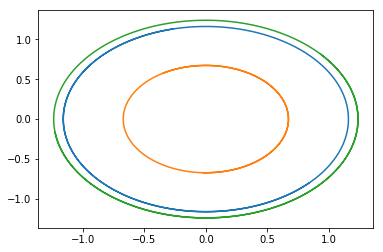

In [8]:
# Plot q vs p
for b in range(3):
    plt.plot( np_x[:,b,0,0,0],np_x[:,b,0,0,1] )

In [9]:
# inverse
tf_xf = m(x0_np)
tf_x0 = m.inverse(tf_xf)
x0_np_new, xf_np = sess.run([tf_x0, tf_xf])
print(np.allclose(x0_np,x0_np_new))
print(np.allclose(xf_np,np_x[-1,...]))

True
True


Test HamiltonianFlow for MLPHamiltonian

In [14]:
from models import MLPHamiltonian

batch = 10
sz = (batch,3,5,2)

x0_np = np.random.randn(*sz).astype(np.float32)

m=HamiltonianFlow( MLPHamiltonian() )

In [15]:
tf_x = m(x0_np, return_full_state=True)
sess.run(tf.global_variables_initializer())
np_x = sess.run(tf_x)

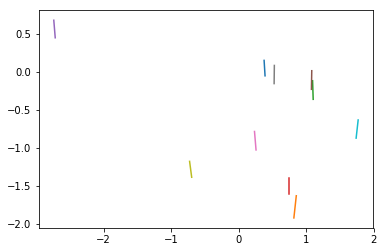

In [16]:
# Plot q vs p
for b in range(10):
    plt.plot( np_x[:,b,0,0,0],np_x[:,b,0,0,1] )

In [17]:
# inverse
tf_xf = m(x0_np)
tf_x0 = m.inverse(tf_xf)
x0_np_new, xf_np = sess.run([tf_x0, tf_xf])
print(np.allclose(x0_np,x0_np_new,atol=1e-6))
print(np.allclose(xf_np,np_x[-1,...]))

True
True
